In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd 

# 训练集验证集batch的loss

# 短时间loss

In [2]:
# 短时间的画图
def Train_and_Valid_MAEloss_shot(train_data,valid_data,name):
    # epoch
    train_data.columns = ['epoch','loss']
    valid_data.columns = ['epoch','loss']
    train_loss_epoch = train_data.groupby(by='epoch').sum()
    valid_loss_epoch = valid_data.groupby(by='epoch').sum()
    train_loss_epoch = list(train_loss_epoch['loss'])
    valid_loss_epoch = list(valid_loss_epoch['loss'])
    f=plt.figure(figsize=(6,5))
    # 做图
    ax1 = plt.subplot(1,1,1)
    ax1.plot(train_loss_epoch,'#d70005',label="train_loss",linewidth=1.5)
    ax1.plot(valid_loss_epoch,'#21266e',label="valid_loss",marker='o',linewidth=0.8,markersize=3)
    ax1.set_xlabel(f'epoch_nums',fontsize=14,c='black',fontproperties="Times New Roman")
    ax1.set_ylabel('MSE Loss',fontsize=14,c='black',fontproperties="Times New Roman")
    ax1.fill_between([i for i in range(len(train_loss_epoch))], train_loss_epoch, color="#d70005", alpha=0.1)
    plt.yticks(fontsize=17,fontproperties="Times New Roman",c='black')
    plt.xticks(fontsize=17,fontproperties="Times New Roman",c='black')
    ax1.margins(x=0)
    ax1.margins(y=0)
    ax1.set_ylim(0,3)
    ax1.legend(loc=1,prop={'family':'Times New Roman','size':14})
    TK = plt.gca()#获取边框
    TK.spines['bottom'].set_color("#000000")#图框下边
    TK.spines['left'].set_color("#000000")#图框左边
    TK.spines['top'].set_color("#000000")#图框上边
    TK.spines['right'].set_color("#000000")#图框右边
    plt.title(f"Train and Valid MSEloss For {name}",fontproperties="Times New Roman",fontsize=18)
    f.savefig(f'../output/{name}/Train_and_Valid_MAEloss_{name}.svg',dpi=3000,bbox_inches='tight')

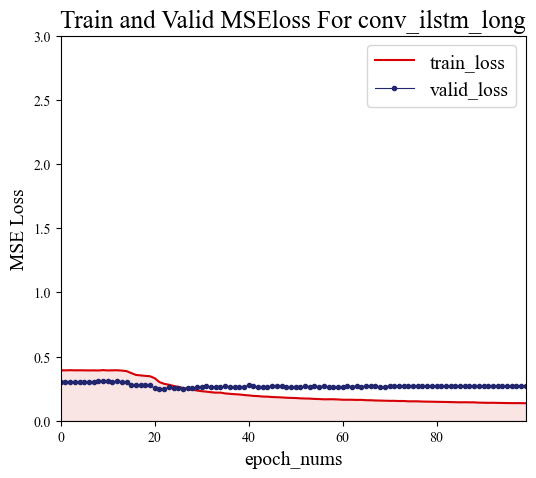

In [7]:
# lstm短时间
train_data = pd.read_csv('../output/conv_ilstm_long/train_loss_list.csv',header=None)
valid_data = pd.read_csv('../output/conv_ilstm_long/valid_loss_list.csv',header=None)
Train_and_Valid_MAEloss_shot(train_data,valid_data,'conv_ilstm_long')

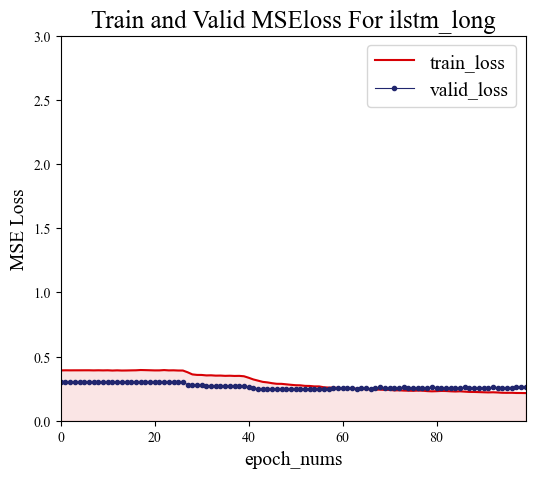

In [8]:
# lstm短时间
train_data = pd.read_csv('../output/ilstm_long/train_loss_list.csv',header=None)
valid_data = pd.read_csv('../output/ilstm_long/valid_loss_list.csv',header=None)
Train_and_Valid_MAEloss_shot(train_data,valid_data,'ilstm_long')

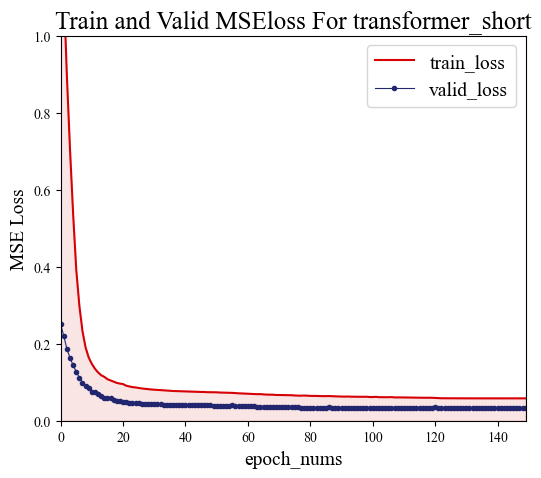

In [29]:
# lstm短时间
train_data = pd.read_csv('../output/transformer_short/train_loss_list.csv',header=None)
valid_data = pd.read_csv('../output/transformer_short/valid_loss_list.csv',header=None)
Train_and_Valid_MAEloss_shot(train_data,valid_data,'transformer_short')

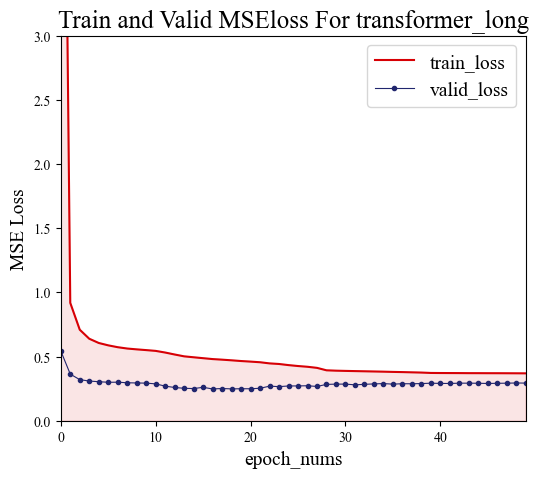

In [8]:
# lstm短时间
train_data = pd.read_csv('../output/transformer_long/train_loss_list.csv',header=None)
valid_data = pd.read_csv('../output/transformer_long/valid_loss_list.csv',header=None)
Train_and_Valid_MAEloss_shot(train_data,valid_data,'transformer_long')

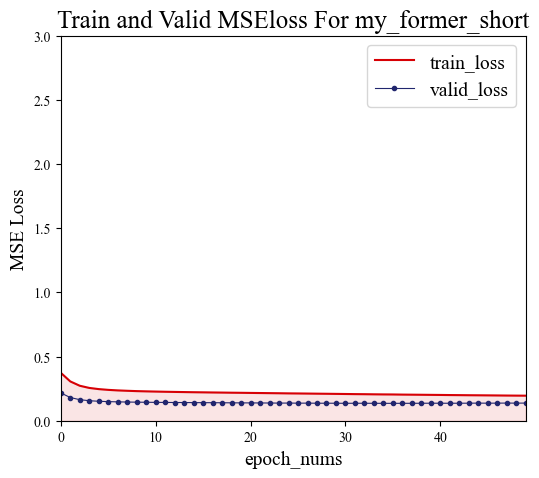

In [3]:
# lstm短时间
train_data = pd.read_csv('../output/my_former_short/train_loss_list.csv', header=None)
valid_data = pd.read_csv('../output/my_former_short/valid_loss_list.csv', header=None)
Train_and_Valid_MAEloss_shot(train_data, valid_data, 'my_former_short')

# 长时间loss

由于长时间的训练和验证的batch不一样，训练是每个eopch都记录下来了，而针对与验证集来说的话是大概40轮训练一次，导致两个loss曲线的横坐标不统一因此需要画两个子图

In [5]:
# 长时间的loss变化曲线
def Train_and_Valid_MAEloss_long(train_data,valid_data,name):
    # epoch
    train_data.columns = ['epoch','loss']
    valid_data.columns = ['epoch','loss']
    train_loss_epoch = train_data.groupby(by='epoch').sum()
    valid_loss_epoch = valid_data.groupby(by='epoch').sum()
    train_x = sorted(list(set(train_data['epoch'])))
    valid_x = sorted(list(set(valid_data['epoch'])))
    train_loss_epoch = list(train_loss_epoch['loss'])
    valid_loss_epoch = list(valid_loss_epoch['loss'])
    f=plt.figure(figsize=(10,5))
    # 做图
    ax1 = plt.subplot(1,2,1)
    ax1.plot(train_x,train_loss_epoch,'#d70005',label="train_loss",linewidth=1.5)
    ax1.set_xlabel(f'epoch_nums',fontsize=14,c='black',fontproperties="Times New Roman")
    ax1.set_ylabel('MAE Loss',fontsize=14,c='black',fontproperties="Times New Roman")
    ax1.fill_between(train_x, train_loss_epoch, color="#d70005", alpha=0.1)
    plt.yticks(fontsize=17,fontproperties="Times New Roman",c='black')
    plt.xticks(fontsize=17,fontproperties="Times New Roman",c='black')
    ax1.margins(x=0)

    ax1.margins(y=0)
    ax1.set_ylim([0, 15])
    ax1.legend(loc=1,prop={'family':'Times New Roman','size':14})
    TK = plt.gca()#获取边框
    TK.spines['bottom'].set_color("#000000")#图框下边
    TK.spines['left'].set_color("#000000")#图框左边
    TK.spines['top'].set_color("#000000")#图框上边
    TK.spines['right'].set_color("#000000")#图框右边
    plt.title(f"Train MAEloss For {name}",fontproperties="Times New Roman",fontsize=18)
    
    # valid loss
    ax2 = plt.subplot(1,2,2)
    ax2.plot(valid_x,valid_loss_epoch,'#21266e',label="valid_loss",linewidth=1.5)
    ax2.set_xlabel(f'epoch_nums(each 50 epochs)',fontsize=14,c='black',fontproperties="Times New Roman")
    ax2.set_ylabel('MAE Loss',fontsize=14,c='black',fontproperties="Times New Roman")
    ax2.fill_between(valid_x, valid_loss_epoch, color="#21266e", alpha=0.1)
    plt.yticks(fontsize=17,fontproperties="Times New Roman",c='black')
    plt.xticks(fontsize=17,fontproperties="Times New Roman",c='black')
    ax2.margins(x=0)

    ax2.margins(y=0)
    ax2.set_ylim([round(min(valid_loss_epoch)), round(max(valid_loss_epoch))+1])
    ax2.legend(loc=1,prop={'family':'Times New Roman','size':14})
    TK = plt.gca()#获取边框
    TK.spines['bottom'].set_color("#000000")#图框下边
    TK.spines['left'].set_color("#000000")#图框左边
    TK.spines['top'].set_color("#000000")#图框上边
    TK.spines['right'].set_color("#000000")#图框右边
    plt.title(f"Valid MSEloss For {name}",fontproperties="Times New Roman",fontsize=18)
    f.savefig(f'.../output/{name}/Train_and_Valid_MAEloss_{name}.svg',dpi=3000,bbox_inches='tight')

In [16]:
# lstm长时间
train_data = pd.read_csv('../output/lstm_long/train_loss_list_short.csv',header=None)
valid_data = pd.read_csv('../output/lstm_long/valid_loss_list_short.csv',header=None)
Train_and_Valid_MAEloss_long(train_data,valid_data,'lstm_long')

FileNotFoundError: [Errno 2] No such file or directory: '../output/lstm_long/train_loss_list_short.csv'

# 测试集每个batch的loss

In [4]:
def Test_MSE_and_MAE_Loss(test_mae,test_mse,name):
    f=plt.figure(figsize=(6,5))
    # 做图
    ax1 = plt.subplot(1,1,1)
    lns1=ax1.plot(test_mae,'#d70005',label="MAE_Loss",marker='o',linewidth=0.8,markersize=1)
    ax1.set_xlabel(f'batch_nums',fontsize=14,c='black',fontproperties="Times New Roman")
    ax1.set_ylabel('MAE Loss',fontsize=14,c='black',fontproperties="Times New Roman")
    plt.yticks(fontsize=17,fontproperties="Times New Roman",c='black')
    plt.xticks(fontsize=17,fontproperties="Times New Roman",c='black')

    ax1.set_ylim([min(test_mae)*0.97, max(test_mae)*1.03])
    ax1.margins(x=0)
    ax1.margins(y=0)
    ax2 = ax1.twinx()  # this is the important function
    ax2.margins(x=0)
    ax2.margins(y=0)
    lns2=ax2.plot(test_mse,'#21266e',label="MSE_Loss",marker='o',linewidth=0.8,markersize=1)
    ax2.set_xlabel(f'batch_nums',fontsize=14,c='black',fontproperties="Times New Roman")
    ax2.set_ylabel('MSE_Loss',fontsize=14,c='black',fontproperties="Times New Roman")
    plt.xticks(fontsize=17,fontproperties="Times New Roman",c='black')
    plt.yticks(fontsize=17,fontproperties="Times New Roman",c='black')
    ax2.set_ylim([min(test_mse)*0.97, max(test_mse)*1.03])
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2,prop={'family':'Times New Roman','size':14})
    plt.title(f"Test MSE and MAE Loss For {name}",fontproperties="Times New Roman",fontsize=18)
    TK = plt.gca()#获取边框
    TK.spines['bottom'].set_color("#000000")#图框下边
    TK.spines['left'].set_color("#000000")#图框左边
    TK.spines['top'].set_color("#000000")#图框上边
    TK.spines['right'].set_color("#000000")#图框右边
    f.savefig(f'../output/{name}/Test_MSE_and_MAE_Loss_{name}.svg',dpi=3000,bbox_inches='tight')

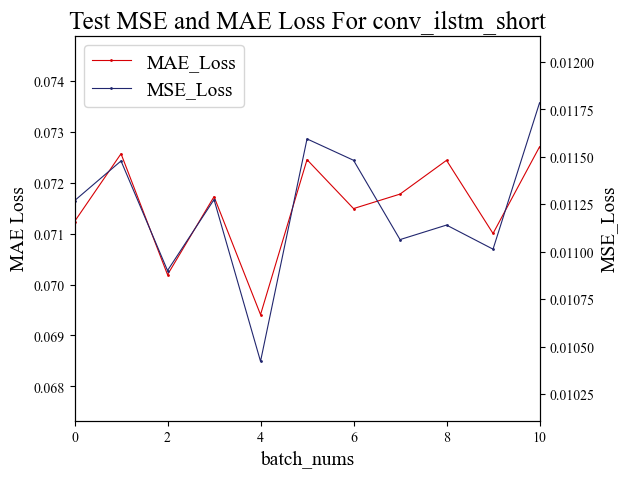

In [14]:
# 长时间
test_mse = list(pd.read_csv('../output/conv_ilstm_short/mse_loss_list.csv',header=None)[0])
test_mae = list(pd.read_csv('../output/conv_ilstm_short/mae_loss_list.csv',header=None)[0])
Test_MSE_and_MAE_Loss(test_mae,test_mse,'conv_ilstm_short')

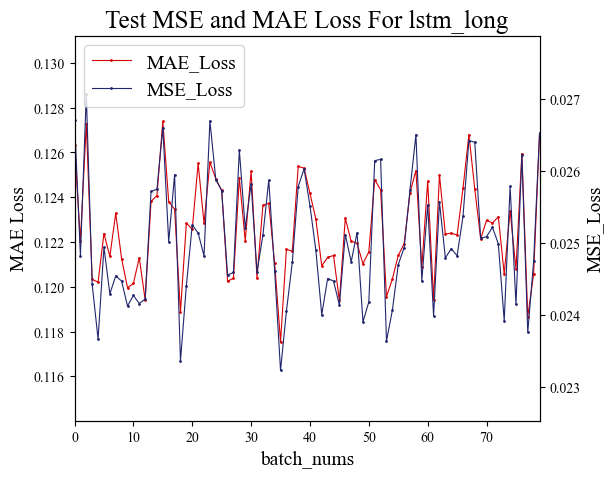

In [11]:
# 长时间
test_mse = list(pd.read_csv('../output/ilstm_long/mse_loss_list.csv',header=None)[0])
test_mae = list(pd.read_csv('../output/ilstm_long/mae_loss_list.csv',header=None)[0])
Test_MSE_and_MAE_Loss(test_mae,test_mse,'ilstm_long')

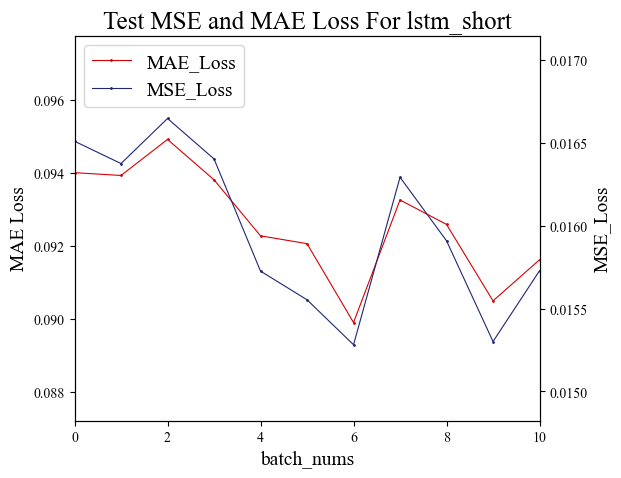

In [33]:
# 短时间
test_mse = list(pd.read_csv('../output/lstm_short/mse_loss_list.csv',header=None)[0])
test_mae = list(pd.read_csv('../output/lstm_short/mae_loss_list.csv',header=None)[0])
Test_MSE_and_MAE_Loss(test_mae,test_mse,'lstm_short')

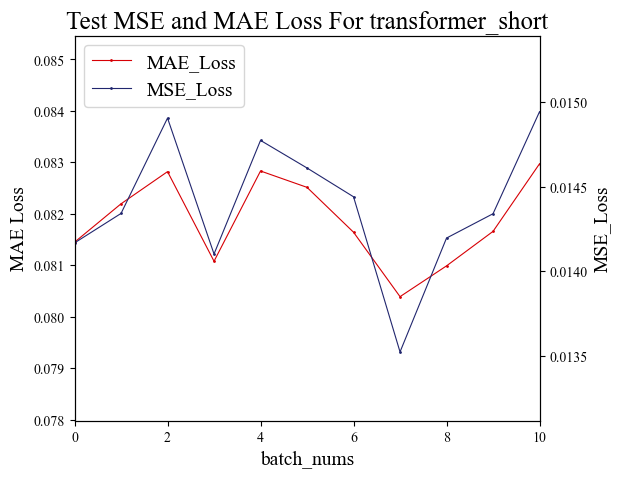

In [25]:
# 长时间
test_mse = list(pd.read_csv('../output/transformer_short/mse_loss_list.csv',header=None)[0])
test_mae = list(pd.read_csv('../output/transformer_short/mae_loss_list.csv',header=None)[0])
Test_MSE_and_MAE_Loss(test_mae,test_mse,'transformer_short')

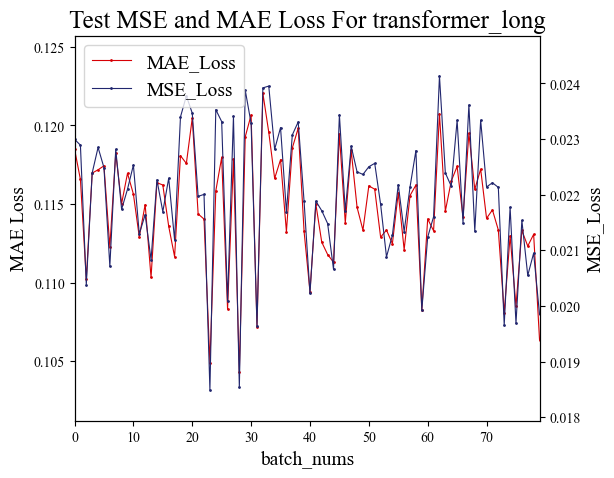

In [11]:
# 长时间
test_mse = list(pd.read_csv('../output/transformer_long/mse_loss_list.csv',header=None)[0])
test_mae = list(pd.read_csv('../output/transformer_long/mae_loss_list.csv',header=None)[0])
Test_MSE_and_MAE_Loss(test_mae,test_mse,'transformer_long')

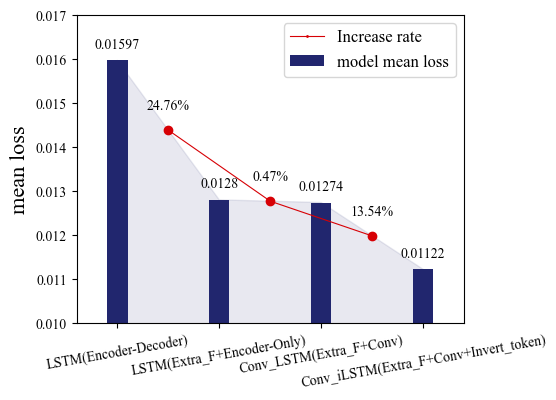

In [57]:
fontsizemy = 16
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax1.margins(x=0)
ax1.margins(y=0)
x = [1,2,3,4]
labels = ['LSTM(Encoder-Decoder)','LSTM(Extra_F+Encoder-Only)','Conv_LSTM(Extra_F+Conv)','Conv_iLSTM(Extra_F+Conv+Invert_token)']
y = [0.01597,0.0128,0.01274,0.01122]
x_pro = [1.5,2.5,3.5]
y_1 = [0.014385,0.01277,0.01198]
y_pro = ['24.76%','0.47%','13.54%']
#lns1 = ax1.plot(time, total_people,'#21266e', label="总人口",linewidth=2)
lns1 = plt.bar(x,y,width = 0.2,color="#21266e",label="model mean loss")
ax1.fill_between(x,y, color="#21266e", alpha=0.1)
ax1.scatter(x_pro, y_1,c='#d70005')  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
ax1.plot(x_pro, y_1,'#d70005',label="Increase rate",marker='o',linewidth=0.8,markersize=1)

for i in range(len(x)):
    plt.text(x[i], y[i]+0.0002, y[i], ha='center', va='bottom',fontproperties="Times New Roman")


for i in range(len(x_pro)):
    plt.text(x_pro[i], y_1[i]+0.0004, y_pro[i], ha='center', va='bottom',fontproperties="Times New Roman")


ax1.set_ylabel('mean loss',fontsize=fontsizemy,fontproperties="Times New Roman")
ax1.legend(loc=1,prop={'family':'Times New Roman','size':fontsizemy-4})
plt.ylim([0.01,0.017])
plt.xlim([0.6,4.4])
plt.xticks(x, labels,fontsize=fontsizemy,fontproperties="Times New Roman",c='black')
plt.yticks(fontsize=fontsizemy,fontproperties="Times New Roman",c='black')
plt.tick_params(axis='x',rotation=10)
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc=2)
plt.show()
fig.savefig('ablation_experiment.svg',dpi=3000,format='svg',bbox_inches='tight')

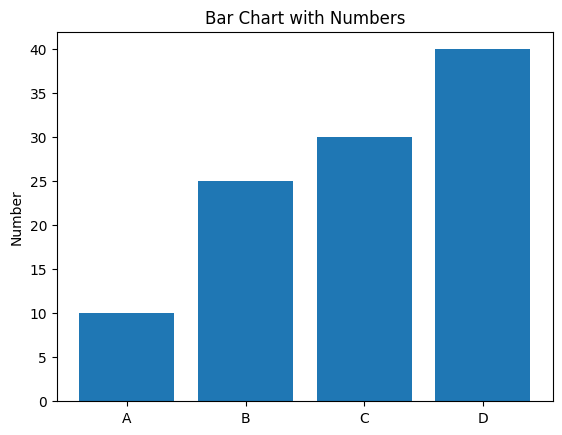

In [33]:
import matplotlib.pyplot as plt

# 定义x轴的标签
labels = ['A', 'B', 'C', 'D']

# 定义每个柱子对应的高度（数字）
heights = [10, 25, 30, 40]

# 创建柱状图
plt.bar(range(len(labels)), heights)

# 设置x轴的标签
plt.xticks(range(len(labels)), labels)

# 添加y轴的标签
plt.ylabel('Number')

# 添加标题
plt.title('Bar Chart with Numbers')

# 展示图形
plt.show()